In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


## Data Cleaning and Preparation

In [24]:
df.isnull().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [25]:
df.columns = df.columns.str.lower()

In [26]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [27]:
status_values = {
    1 : 'ok', 
    2: 'default', 
    0: 'unk'
}

df.status = df.status.map(status_values)

In [28]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [29]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'singled',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorsed',
    0: 'unk',
}

df.marital = df.marital.map(marital_values)

record_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(record_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [30]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,singled,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,singled,no,fixed,46,107,0,0,310,910


In [31]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [32]:
df.income.replace(to_replace=99999999, value=np.nan).max()

959.0

In [33]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [34]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [35]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [36]:
df = df[df.status != 'unk'].reset_index(drop = True)

In [37]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [38]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [39]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [40]:
del df_train['status']
del df_val['status']
del df_test['status']

# Decision Trees

In [41]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [42]:
xi = df_train.iloc[0].to_dict()

In [43]:
assess_risk(xi)

'ok'

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

### turn training df into lists of dictionaries and then turn the lod into the feature matrix

In [45]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [46]:
## train the dictionary vectorizer

In [47]:
dv = DictVectorizer(sparse=False)

In [48]:
X_train = dv.fit_transform(train_dicts)

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)

train:  1.0


In [51]:
val_dicts = df_val.fillna(0).to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [52]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val: ', auc)

val:  0.6553274321280667


In [53]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [54]:
val_dicts = df_val.fillna(0).to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [55]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train: ', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val: ', auc)

train:  0.7054989859726213
val:  0.6685264343319367


In [56]:
from sklearn.tree import export_text

In [57]:
print(export_text(dt, dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0



C:\Users\MIMMY\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass feature_names=['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'job=unk', 'marital=divorsed', 'marital=married', 'marital=separated', 'marital=singled', 'marital=unk', 'marital=widow', 'price', 'records=no', 'records=yes', 'seniority', 'time'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Decision Tree Algorithm

In [58]:
data = [
    [8000, 'default'],
    [2000,  'default'],
    [0,  'default'],
    [5000,'ok'],
    [5000, 'ok'],
    [4000,'ok'],
    [9000, 'ok'],
    [3000,'default'],
]
df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [59]:
## 2 columns . the first one is assert whilst the second one is status

In [60]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [61]:
Ts = [0,2000, 3000, 4000, 5000, 8000]

In [62]:
from IPython.display import display

In [63]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize = True))
    
    display(df_right)
    print(df_right.status.value_counts(normalize = True))
    print(T)

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64
0
2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64
2000
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
3000
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64
4000
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
5000
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64
8000


In [64]:
## best T is 3000 since it has the lowest avg value

In [65]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000,'default'],
]
df_example = pd.DataFrame(data, columns=['assets','debts', 'status'])
df_example

,assets,debts,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [66]:
df_example.sort_values('debts')

,assets,debts,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [67]:
thresholds = {
    'assets':[0,2000, 3000, 4000, 5000, 8000],
    'debts': [500, 1000, 2000]    
}

In [68]:
for feature, Ts in thresholds.items():
    print('####################')
    print(feature)
    for T in Ts:
        print(T)
    
        df_left = df_example[df_example[feature] <= T]  # Corrected here
        df_right = df_example[df_example[feature] > T]  # Corrected here
    
        display(df_left)  
        print(df_left['status'].value_counts(normalize=True)) 
    
        display(df_right)
        print(df_right['status'].value_counts(normalize=True))
        print()
    print('####################')

####################
assets
0


,assets,debts,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debts,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debts,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debts,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debts,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debts,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debts,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

####################
####################
debts
500


,assets,debts,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debts,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debts,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debts,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

####################


In [69]:
from sklearn.tree import DecisionTreeClassifier

## Decision Trees Parameter Tuning

In [70]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.748
  10 -> 0.663
  15 -> 0.667
  20 -> 0.642
None -> 0.656


In [71]:
## selecting max_depth and min sample leaves. the best max_dept falls in 4,5,6

In [72]:
scores = []
for d in [4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [73]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [74]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
22,6,15,0.785695
21,6,10,0.778299
24,6,100,0.776434
23,6,20,0.773982
14,5,20,0.773537


In [75]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.766  0.753
2                 0.761  0.766  0.766
5                 0.761  0.768  0.760
10                0.761  0.762  0.778
15                0.764  0.772  0.786
20                0.761  0.774  0.774
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

In [76]:
import seaborn as sns

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

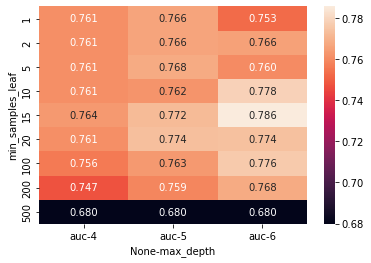

In [77]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [78]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Esembles And Randam Forests

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)

In [81]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [82]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [83]:
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [84]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [85]:
scores = []
for n in range(10, 201,10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n , auc))

In [86]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [87]:
import matplotlib.pyplot as plt

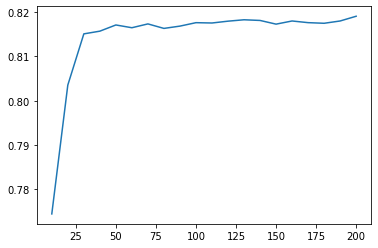

In [88]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [89]:
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, d, auc))

In [90]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth', 'auc'])

In [91]:
df_scores.head()

,n_estimators,max_depth,auc
0,10,5,0.787699
1,20,5,0.797731
2,30,5,0.800305
3,40,5,0.799708
4,50,5,0.799878


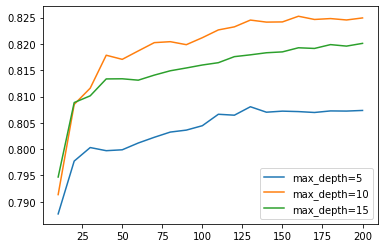

In [92]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_depth=%d' % d)
    
plt.legend()

In [93]:
max_depth = 10

In [94]:
scores = []
for s in [1,3,5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s,random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s,n, auc))

In [95]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [96]:
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


In [97]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1,3,5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

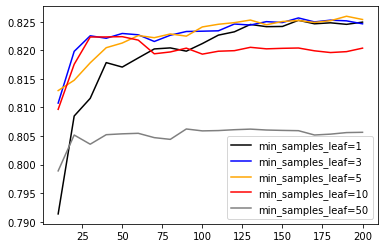

In [98]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1,3,5, 10, 50]

for s,col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color = col, label = 'min_samples_leaf=%d' % s)
    
plt.legend()

In [99]:
min_samples_leaf = 3

In [100]:
rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=min_samples_leaf,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

## Gradient Boosting and XGBoost

In [101]:
## combining multiple decision tree models into one ensemble.
## Boosting is when you get a data , train a model and make predictions then we get errors of model 1 
## and based on that errors, we train model 2 .....and so on. do it for many iterations and combine multiple preds
## into a final prediction

In [102]:
!pip install xgboost

In [103]:
import xgboost as xgb

In [104]:
xgb.DMatrix(X_train, label=y_train)

In [105]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [106]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [107]:
y_pred = model.predict(dval)

In [108]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

In [109]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [110]:
%%capture output
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, dtrain,num_boost_round=200,verbose_eval=5, evals=watchlist)

In [111]:
s = output.stdout

In [112]:
line = s.split('\n')[0]

In [113]:
line

'[0]\ttrain-auc:0.86730\tval-auc:0.77938'

In [114]:
num_iter, train_auc, val_auc = line.split('\t')

In [115]:
int(num_iter.strip('[]'))

0

In [116]:
float(train_auc.split(':')[1])

0.8673

In [117]:
float(val_auc.split(':')[1])

0.77938

In [118]:
def parse_xgb_output(output):
    results = []
    tree = []
    aucs_train = []
    aucs_val = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_auc.split(':')[1])
        val = float(val_auc.split(':')[1])
        
        results.append((it, train, val))
        
        
    columns = ['num_iter', 'train_auc', 'val_auc']    
    df_results = pd.DataFrame(results, columns=columns)    
    return df_results

In [119]:
df_score = parse_xgb_output(output)

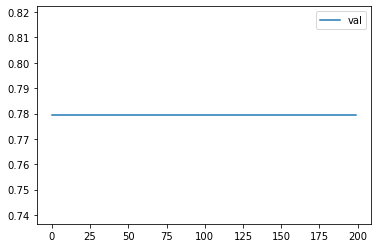

In [120]:
#plt.plot(df_score.num_iter, df_score.train_auc, label = 'train')
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')

plt.legend()

## XBoost Parameter Tuning

In [121]:
%%capture output
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, dtrain,num_boost_round=200,verbose_eval=5, evals=watchlist)

In [122]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [123]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7853194400716863

In [124]:
rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=min_samples_leaf,random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [125]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [126]:
y_y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [127]:
## since Xgboost is the best one with the acuracy of 83 %
## we will train the full data with that model

In [128]:
df_full_train = df_full_train.reset_index(drop=True)

In [129]:
y_full_train = (df_full_train.status == 'default').astype('int').values

In [130]:
del df_full_train['status']

In [131]:
dicts_full_train = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [132]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [133]:
%%capture output
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, dfulltrain,num_boost_round=175)

In [134]:
y_pred = model.predict(dtest)

In [135]:
roc_auc_score(y_test, y_pred)

0.8289367577342261